In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart.data (2).csv")
df.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [4]:
df1=df.drop(columns=['Unnamed: 0'])
df1.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [5]:
df2 = df1.rename(columns={'biking':'Biking','smoking':'Smoking','heart.disease':'HeartDisease'})
df2.head()

,Biking,Smoking,HeartDisease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Biking        498 non-null    float64
 1   Smoking       498 non-null    float64
 2   HeartDisease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [7]:
def classify_activitylevel(Biking):
    if Biking <20:
        return 'Low'
    elif Biking >= 20 and Biking <60:
        return 'Moderate'
    else:
        return 'High'


df2['ActivityLevel'] = df2['Biking'].apply(classify_activitylevel)
df2.head()

,Biking,Smoking,HeartDisease,ActivityLevel
0,30.801246,10.896608,11.769423,Moderate
1,65.129215,2.219563,2.854081,High
2,1.959665,17.588331,17.177803,Low
3,44.800196,2.802559,6.816647,Moderate
4,69.428454,15.974505,4.062224,High


In [8]:
df2.groupby(['ActivityLevel']) ['HeartDisease'].mean()

ActivityLevel
High         4.332728
Low         15.662806
Moderate    10.139708
Name: HeartDisease, dtype: float64

In [9]:
print(df2.columns.tolist())

['Biking', 'Smoking', 'HeartDisease', 'ActivityLevel']


In [10]:
df2['HighRisk'] = (df2['Smoking'] > 10) & (df2['HeartDisease'] > 10)
df2.head()

,Biking,Smoking,HeartDisease,ActivityLevel,HighRisk
0,30.801246,10.896608,11.769423,Moderate,True
1,65.129215,2.219563,2.854081,High,False
2,1.959665,17.588331,17.177803,Low,True
3,44.800196,2.802559,6.816647,Moderate,False
4,69.428454,15.974505,4.062224,High,False


In [11]:
df2['HighRisk'].sum()

np.int64(195)

In [12]:
matrix = df2.corr(numeric_only=True)
print(matrix)

                Biking   Smoking  HeartDisease  HighRisk
Biking        1.000000  0.015136     -0.935455 -0.561968
Smoking       0.015136  1.000000      0.309131  0.511392
HeartDisease -0.935455  0.309131      1.000000  0.703572
HighRisk     -0.561968  0.511392      0.703572  1.000000


In [33]:
hd_median = df2['HeartDisease'].median()
filter_hd = df2[df2['HeartDisease'] > hd_median]
filter_hd

,Biking,Smoking,HeartDisease,ActivityLevel,HighRisk
0,30.801246,10.896608,11.769423,Moderate,True
2,1.959665,17.588331,17.177803,Low,True
7,4.784604,12.835021,15.854654,Low,True
9,35.257449,23.277683,12.098484,Moderate,True
13,26.166801,6.645750,10.597807,Moderate,False
...,...,...,...,...,...
486,22.021893,19.499258,13.770639,Moderate,True
492,21.599230,7.604330,12.373691,Moderate,False
493,47.660440,27.562464,11.294392,Moderate,True
495,8.279743,6.423720,13.495168,Low,False


<Axes: xlabel='Biking', ylabel='HeartDisease'>

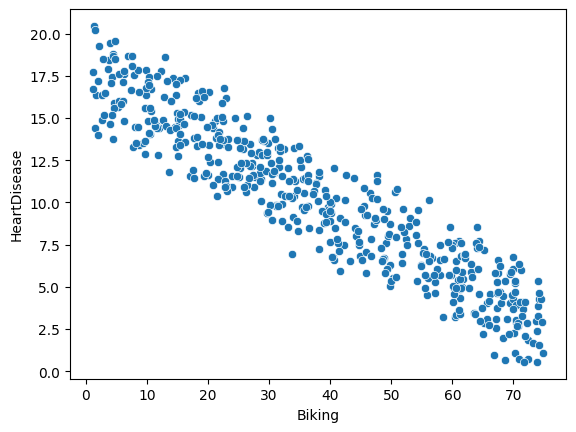

In [13]:
sns.scatterplot(x='Biking',y='HeartDisease',data = df2)

<Axes: xlabel='Smoking', ylabel='Count'>

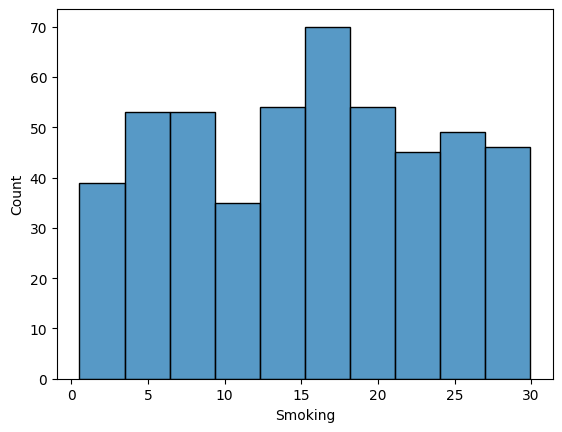

In [14]:
sns.histplot(x='Smoking',data=df2)

<Axes: xlabel='ActivityLevel', ylabel='HeartDisease'>

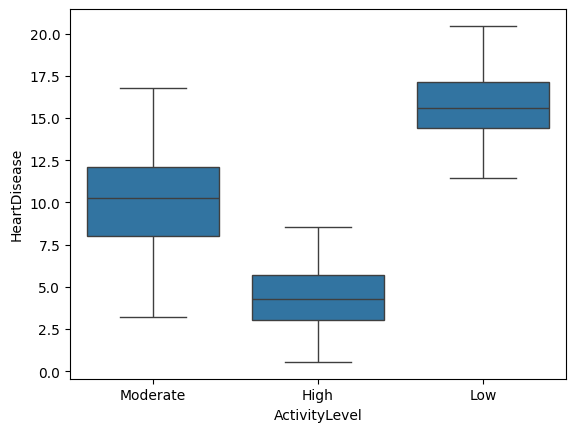

In [22]:
sns.boxplot(x='ActivityLevel',y='HeartDisease',data=df2)

<Axes: xlabel='ActivityLevel', ylabel='HeartDisease'>

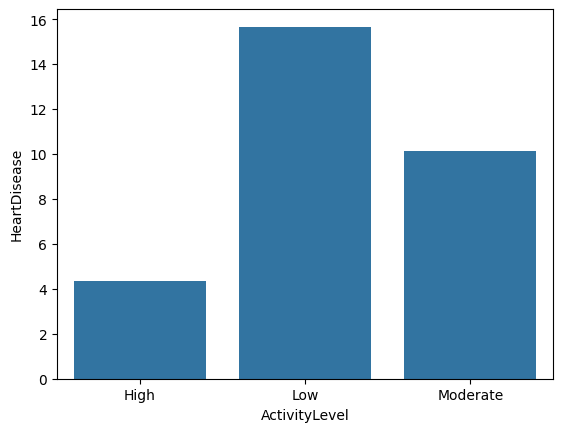

In [26]:
grouped = df2.groupby(['ActivityLevel']) ['HeartDisease'].mean().reset_index()
sns.barplot(x='ActivityLevel',y='HeartDisease',data=grouped)